In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('results/13C_pg.txt')
data[:,2] = data[:,2] / np.max(data[:,2])

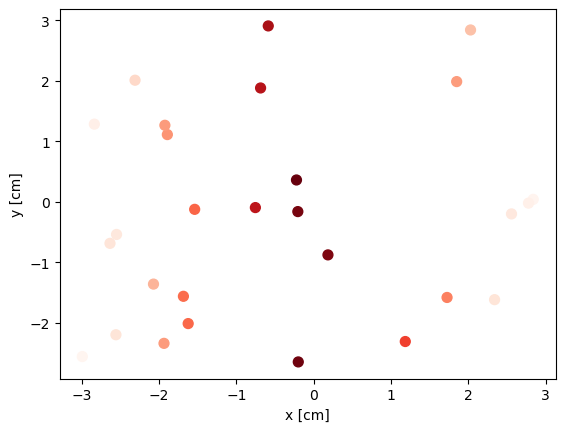

In [3]:
# Make a 2D plot for scatter, where the z column is the color
fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(data[:,0], data[:,1], c=data[:,2], s=50, cmap='Reds')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')

plt.show()

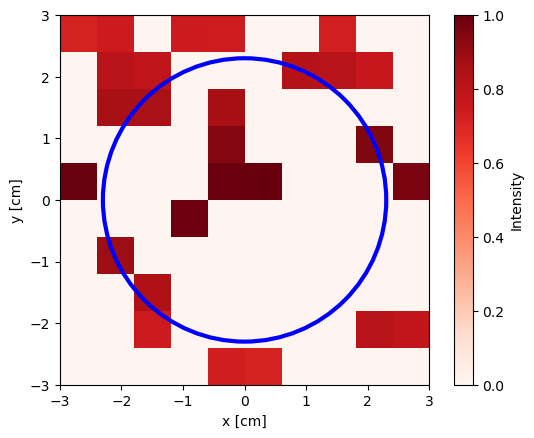

In [11]:
# Make an histogram by hand: the first and the second column are the x and y
# We set a histogram with 100 bins for each axis between -3 cm and 3 cm
# Then we add the items in each bin with the z column
nbins = 10

fig = plt.figure()

ax = fig.add_subplot(111)

x = data[:,0]
y = data[:,1]
z = data[:,2]

histo = np.zeros((nbins,nbins))
_, xedges, yedges = np.histogram2d(x, y, bins=(nbins,nbins), range=[[-3,3],[-3,3]])
for x0, y0, z0 in zip(x, y, z):
    xbin = np.digitize(x0, xedges)
    ybin = np.digitize(y0, yedges)
    if( histo[xbin-1, ybin-1] == 0 ):
        histo[xbin-1, ybin-1] = z0
    else:
        histo[xbin-1, ybin-1] = (z0 + histo[xbin-1, ybin-1]) / 2

ax.imshow(histo, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')

# Plot a circle of radius 2.1 cm
circle = plt.Circle((0, 0), 2.3, color='b', lw=3, fill=False)
ax.add_artist(circle)

# Show z axis as a color bar
cbar = plt.colorbar(ax.imshow(histo, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds'))
cbar.set_label('Intensity')

plt.show()